Inference Model on Random Images

---

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to load the model
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

# Function to preprocess a single image for inference
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to display an image
def display_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

# Function to perform inference on a single image and display the result
def predict_and_display_image(model, img_path, target_size=(224, 224), class_names=None):
    # Preprocess the image
    img_array = preprocess_image(img_path, target_size)
    
    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Display the image
    display_image(img_path)
    
    # Show the predicted class and confidence
    if class_names:
        class_name = class_names[predicted_class[0]]
        print(f"File: {os.path.basename(img_path)}")
        print(f"Predicted class: {class_name}")
    else:
        print(f"File: {os.path.basename(img_path)}")
        print(f"Predicted class (index): {predicted_class}")
    
    print(f"Prediction confidence: {prediction}")

# Function to perform inference on 10 random images and display each
def predict_and_display_random_images(model, img_dir, target_size=(128, 128), class_names=None):
    # Get all image files from the directory
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
    
    # Select random images
    random_img_files = random.sample(img_files, 10)
    
    for img_file in random_img_files:
        img_path = os.path.join(img_dir, img_file)
        print(f"\nImage: {img_file}")
        predict_and_display_image(model, img_path, target_size, class_names)



Image: salmo.2620.jpg
1/1 [==============================] - 1s 533ms/step


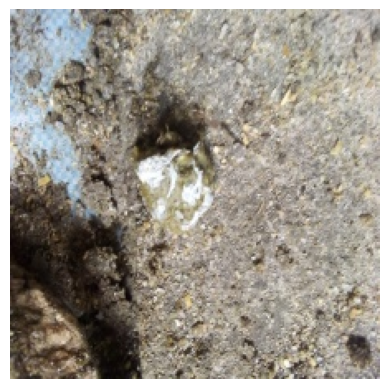

File: salmo.2620.jpg
Predicted class: salmo
Prediction confidence: [[7.0295541e-06 2.8426705e-06 1.2309092e-09 9.9999011e-01]]

Image: salmo.2236.jpg
1/1 [==============================] - 0s 32ms/step


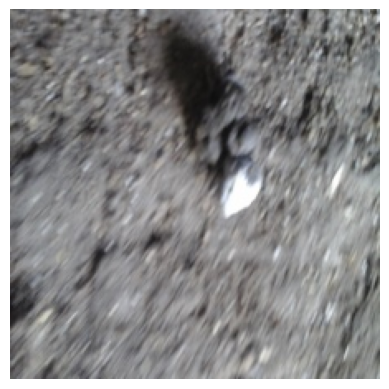

File: salmo.2236.jpg
Predicted class: salmo
Prediction confidence: [[4.4976273e-10 6.4745031e-08 1.4306237e-07 9.9999976e-01]]

Image: cocci.1462.jpg
1/1 [==============================] - 0s 48ms/step


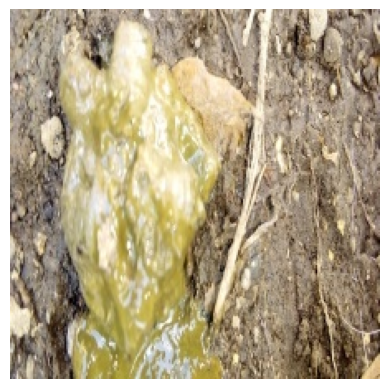

File: cocci.1462.jpg
Predicted class: cocci
Prediction confidence: [[1.0000000e+00 5.6931164e-15 1.7650442e-16 1.7686286e-10]]

Image: cocci.962.jpg
1/1 [==============================] - 0s 32ms/step


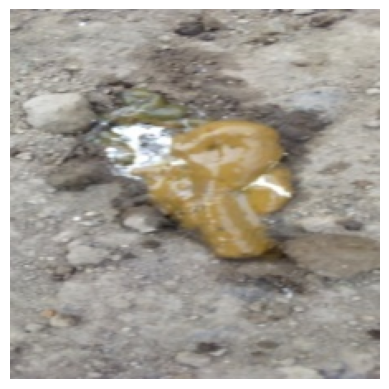

File: cocci.962.jpg
Predicted class: cocci
Prediction confidence: [[1.0000000e+00 2.1455572e-11 8.8341080e-21 1.1693119e-12]]

Image: ncd.41.jpg
1/1 [==============================] - 0s 30ms/step


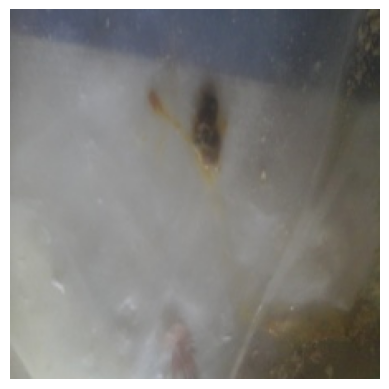

File: ncd.41.jpg
Predicted class: ncd
Prediction confidence: [[3.3632918e-12 6.0420763e-07 9.9999940e-01 4.7813320e-12]]

Image: salmo.2202.jpg
1/1 [==============================] - 0s 38ms/step


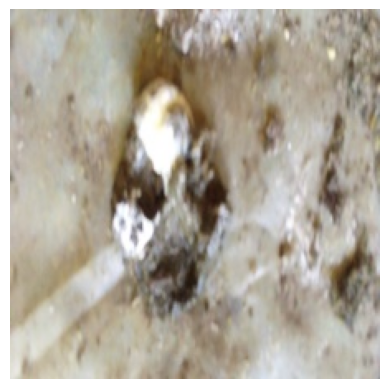

File: salmo.2202.jpg
Predicted class: salmo
Prediction confidence: [[2.1788789e-14 9.7068707e-12 4.9054355e-04 9.9950945e-01]]

Image: salmo.899.jpg
1/1 [==============================] - 0s 31ms/step


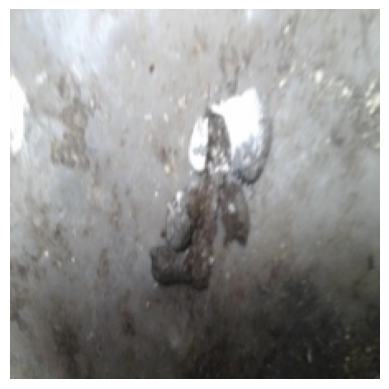

File: salmo.899.jpg
Predicted class: salmo
Prediction confidence: [[4.0804701e-07 3.6250846e-03 1.1771620e-05 9.9636275e-01]]

Image: ncd.436.jpg
1/1 [==============================] - 0s 54ms/step


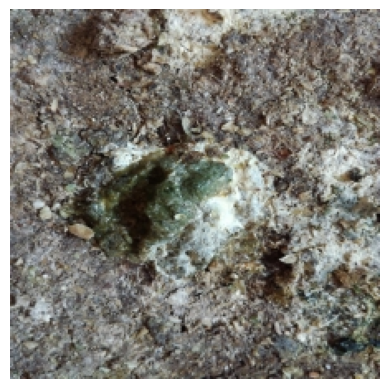

File: ncd.436.jpg
Predicted class: ncd
Prediction confidence: [[2.2273965e-10 3.4571749e-15 1.0000000e+00 9.6267447e-12]]

Image: salmo.1103.jpg
1/1 [==============================] - 0s 25ms/step


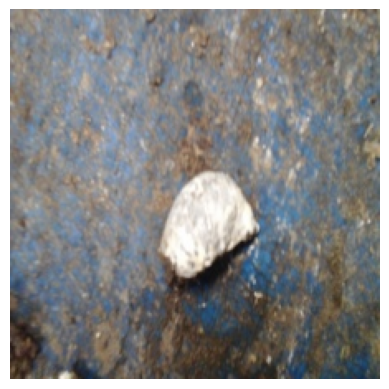

File: salmo.1103.jpg
Predicted class: salmo
Prediction confidence: [[8.8847502e-10 2.2406031e-12 1.7800026e-14 1.0000000e+00]]

Image: healthy.1362.jpg
1/1 [==============================] - 0s 31ms/step


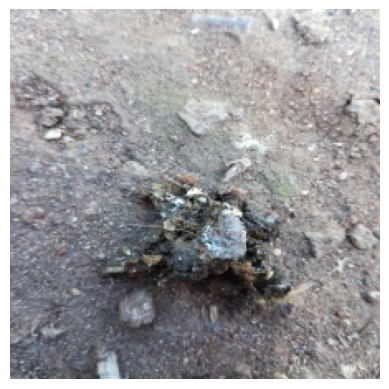

File: healthy.1362.jpg
Predicted class: healthy
Prediction confidence: [[5.4868073e-03 9.9451268e-01 3.9183314e-07 1.2852978e-07]]


In [3]:
# Load the model
model_path = '../model/mobilenetV2/mobilenetv2_ft.h5'
model = load_model(model_path)

# Define class names if available
class_names = ['cocci', 'healthy', 'ncd', 'salmo'] 

# Perform inference on 10 random images from Dataset/Train folder
img_dir = '../all_new'  # Path ke folder gambar
predict_and_display_random_images(model, img_dir, class_names=class_names)

---